# Business Understanding

eCommerce has taken over the retail space making it close to impossible for brick and mortar stores to compete with larger retailers such as Amazon, Target, or Walmart.  Over the years we have seen stores begin to close their doors due to the innability to keep up with online competitors.

Goodreads is an online social platform which gives readers the ability to share and rank their most recent books read.  Once a user marks a book read or rates the book, the platform will recommend a new book to the user. A recent study was done which showed 93% of customers will read online reviews prior to purchasing. 

Barnes and Noble is looking to understand what books should be showcased in their stores.  They are looking to get ahead of the game by utilizing a model which can predict the rating of a book on the most ppular book reviewed site.

Barnes and Noble is looking to rebrand their company by partnering with goodreads.  They are looking for a model to be created which can predict what a customer will rank a book before even reading.  A recent study was done which showed 93% of customers will read online reviews prior to purchasing.  By focusing on a predictive model, this will help retain customers by creating a new avenue of personalization.

# Data Understanding

This dataset contains more than 1.3M book reviews about 25,475 books and 18,892 users.  It was found through the Kaggle Good Reads Book Competition.  A train & test set are provided.

The dataset of this competition is taken from UCSD Book Graph.

## Import Packages

Import necessary packages to load datasets and begin EDA.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

Load both the train and test CSV to view what each entails.

In [2]:
df = pd.read_csv("Data/goodreads_train.csv")

## Previewing Data

Load information on train dataset.

### Data Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900000 entries, 0 to 899999
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       900000 non-null  object
 1   book_id       900000 non-null  int64 
 2   review_id     900000 non-null  object
 3   rating        900000 non-null  int64 
 4   review_text   900000 non-null  object
 5   date_added    900000 non-null  object
 6   date_updated  900000 non-null  object
 7   read_at       808234 non-null  object
 8   started_at    625703 non-null  object
 9   n_votes       900000 non-null  int64 
 10  n_comments    900000 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 75.5+ MB


### Data Head

View first five rows of train dataset.

In [4]:
df.head()

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,8842281e1d1347389f2ab93d60773d4d,18245960,dfdbb7b0eb5a7e4c26d59a937e2e5feb,5,This is a special book. It started slow for ab...,Sun Jul 30 07:44:10 -0700 2017,Wed Aug 30 00:00:26 -0700 2017,Sat Aug 26 12:05:52 -0700 2017,Tue Aug 15 13:23:18 -0700 2017,28,1
1,8842281e1d1347389f2ab93d60773d4d,16981,a5d2c3628987712d0e05c4f90798eb67,3,Recommended by Don Katz. Avail for free in Dec...,Mon Dec 05 10:46:44 -0800 2016,Wed Mar 22 11:37:04 -0700 2017,NaN,NaN,1,0
2,8842281e1d1347389f2ab93d60773d4d,28684704,2ede853b14dc4583f96cf5d120af636f,3,"A fun, fast paced science fiction thriller. I ...",Tue Nov 15 11:29:22 -0800 2016,Mon Mar 20 23:40:27 -0700 2017,Sat Mar 18 23:22:42 -0700 2017,Fri Mar 17 23:45:40 -0700 2017,22,0
3,8842281e1d1347389f2ab93d60773d4d,27161156,ced5675e55cd9d38a524743f5c40996e,0,Recommended reading to understand what is goin...,Wed Nov 09 17:37:04 -0800 2016,Wed Nov 09 17:38:20 -0800 2016,NaN,NaN,5,1
4,8842281e1d1347389f2ab93d60773d4d,25884323,332732725863131279a8e345b63ac33e,4,"I really enjoyed this book, and there is a lot...",Mon Apr 25 09:31:23 -0700 2016,Mon Apr 25 09:31:23 -0700 2016,Sun Jun 26 00:00:00 -0700 2016,Sat May 28 00:00:00 -0700 2016,9,1


In [5]:
df.tail()

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
899995,b9450d1c1f97f891c392b1105959b56e,11832081,7c34c15ad8cb28a4afca32946e2016ea,3,3.5 stars. \n Jenna is a popular YA author and...,Fri Nov 16 22:10:17 -0800 2012,Sat Nov 17 22:42:44 -0800 2012,Sat Nov 17 00:00:00 -0800 2012,Fri Nov 16 00:00:00 -0800 2012,0,0
899996,b9450d1c1f97f891c392b1105959b56e,16095092,e979c735276431915d089cfaf446d64f,3,This was a quick read for me. I have read a lo...,Fri Nov 16 22:09:49 -0800 2012,Sat Nov 17 23:38:58 -0800 2012,Sat Nov 17 00:00:00 -0800 2012,Fri Nov 16 00:00:00 -0800 2012,1,1
899997,b9450d1c1f97f891c392b1105959b56e,8430896,feb9fe6439f9fbba8a1cce36020ad977,4,** spoiler alert ** \n 3.5 stars. \n This book...,Tue Nov 13 05:38:24 -0800 2012,Tue Nov 13 23:29:17 -0800 2012,Tue Nov 13 00:00:00 -0800 2012,Tue Nov 13 00:00:00 -0800 2012,1,0
899998,b9450d1c1f97f891c392b1105959b56e,12275680,741e29369f70531bfffbd02add86f228,4,** spoiler alert ** \n Another fun read from M...,Mon Nov 12 05:42:30 -0800 2012,Tue Nov 13 22:32:05 -0800 2012,Tue Nov 13 00:00:00 -0800 2012,Mon Nov 12 00:00:00 -0800 2012,0,0
899999,b9450d1c1f97f891c392b1105959b56e,17005,d55f3a967230940e75a314700caec9a5,3,** spoiler alert ** \n 3.5 stars \n I liked it...,Sun Nov 11 00:05:43 -0800 2012,Sun Nov 11 21:59:08 -0800 2012,Sun Nov 11 00:00:00 -0800 2012,Sun Nov 11 00:00:00 -0800 2012,0,0


## Data Preperation

### Null Values

Looking at the null values we will be able to make a better decision on what to do with those two columns once we explore the data a little deeper.

In [6]:
df.isna().sum()

user_id              0
book_id              0
review_id            0
rating               0
review_text          0
date_added           0
date_updated         0
read_at          91766
started_at      274297
n_votes              0
n_comments           0
dtype: int64

In [7]:
df.read_at = df.read_at.fillna(value = "0")

In [8]:
df.started_at = df.started_at.fillna(value = "N/A")

In [9]:
df.isna().sum()

user_id         0
book_id         0
review_id       0
rating          0
review_text     0
date_added      0
date_updated    0
read_at         0
started_at      0
n_votes         0
n_comments      0
dtype: int64

## Exploring Columns

### user_id

User Id is the numerical number given to a user.  This is their unique identifier.  There are 12,188 User id's in this dataset.

In [10]:
user = len(pd.unique(df['user_id']))
  
print("No.of.unique values :", 
      user)

No.of.unique values : 12188


### book_id

Book Id is the numerical number given to a book.  This is their unique identifier.  There are 25,474 book id's in this dataset.

In [11]:
book = len(pd.unique(df['book_id']))
  
print("No.of.unique values :", 
      book)

No.of.unique values : 25474


### review_id

Review id is the numerical number given to an individual review.  There are 900,000 unique reviews within this dataset.  This means that that every row is an individual review.

In [12]:
review = len(pd.unique(df['review_id']))
  
print("No.of.unique values :", 
      review)

No.of.unique values : 900000


### rating

Rating is the number which is given during a review.  0 is the lowest score you can receive and 5 is the highest score you can receive.

In [13]:
df['rating'].value_counts()

4    313688
5    265007
3    188972
2     72627
0     30988
1     28718
Name: rating, dtype: int64

### n_votes

Votes is the number of votes which a review contains.

In [14]:
df['n_votes'].value_counts(normalize=True)

0       0.581260
1       0.157020
2       0.069991
3       0.040274
4       0.026211
          ...   
894     0.000001
591     0.000001
291     0.000001
387     0.000001
1023    0.000001
Name: n_votes, Length: 540, dtype: float64

In [15]:
n_votes_data = df.groupby('rating').mean()['n_votes'].sort_values().reset_index()

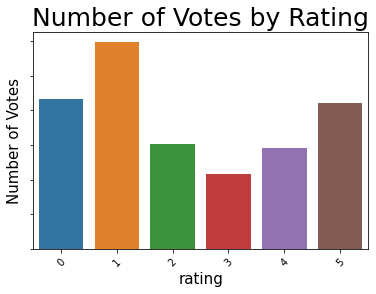

In [16]:
ax = sns.barplot(x = 'rating', y = 'n_votes', data=n_votes_data)
ax.set_xlabel('rating', size = 15)
ax.set_ylabel('Number of Votes', size = 15)
ax.set_title('Number of Votes by Rating', size = 25)
ax.tick_params(axis='x', rotation=45)
ax.set(yticklabels=[]);

### n_comments

In [17]:
df['n_comments'].value_counts(normalize=True)

0      0.837780
2      0.040009
1      0.039028
3      0.017184
4      0.014027
         ...   
221    0.000001
222    0.000001
223    0.000001
225    0.000001
170    0.000001
Name: n_comments, Length: 236, dtype: float64

In [18]:
n_comments_data = df.groupby('rating').mean()['n_comments'].sort_values().reset_index()

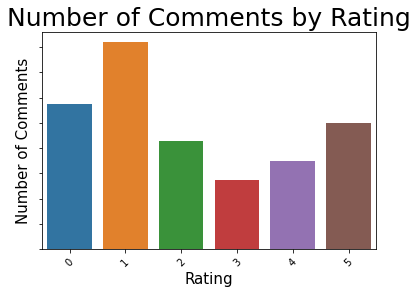

In [19]:
ax = sns.barplot(x = 'rating', y = 'n_comments', data=n_comments_data)
ax.set_xlabel('Rating', size = 15)
ax.set_ylabel('Number of Comments', size = 15)
ax.set_title('Number of Comments by Rating', size = 25)
ax.tick_params(axis='x', rotation=45)
ax.set(yticklabels=[]);

## Word Cloud

In [20]:
Five_rating = " ".join(review for review in df[df["rating"]==5]['review_text'])
Four_Rating = " ".join(review for review in df[df["rating"]==4]['review_text'])
Three_Rating = " ".join(review for review in df[df["rating"]==3]['review_text'])
Two_Rating = " ".join(review for review in df[df["rating"]==2]['review_text'])
One_Rating = " ".join(review for review in df[df["rating"]==1]['review_text'])

### Word Cloud Five Rating

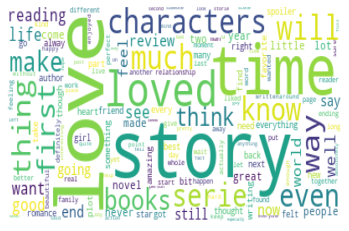

In [21]:
from wordcloud import WordCloud, STOPWORDS

wc_stopwords= set(STOPWORDS)
wc_new_words = ["book", "read", "character", "really", "one"]
wc_new_stopwords=wc_stopwords.union(wc_new_words)

wordcloud_five = WordCloud(collocations=False,background_color="white", max_words=150, stopwords=wc_new_stopwords).generate(Five_rating)

# Display the generated image:
plt.imshow(wordcloud_five, interpolation='bilinear',aspect="auto")
plt.axis("off")
# store to file
plt.show()

### Word Cloud Four Rating

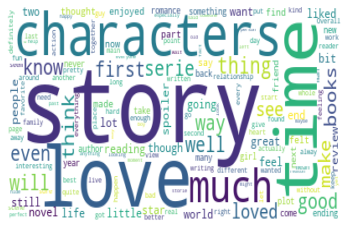

In [22]:
wordcloud_four = WordCloud(collocations=False,background_color="white", max_words=150, stopwords=wc_new_stopwords).generate(Four_Rating)

# Display the generated image:
plt.imshow(wordcloud_four, interpolation='bilinear',aspect="auto")
plt.axis("off")
# store to file
plt.show()

### Word Cloud Three Rating

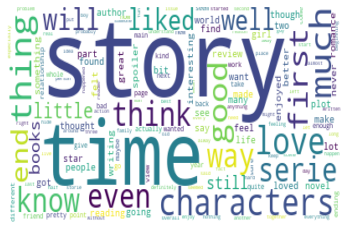

In [23]:
wordcloud_three = WordCloud(collocations=False,background_color="white", max_words=150, stopwords=wc_new_stopwords).generate(Three_Rating)

# Display the generated image:
plt.imshow(wordcloud_three, interpolation='bilinear',aspect="auto")
plt.axis("off")
# store to file
plt.show()

### Word Cloud Two Rating

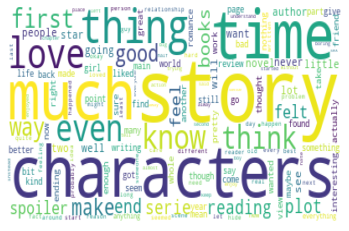

In [24]:
wordcloud_two = WordCloud(collocations=False,background_color="white", max_words=150, stopwords=wc_new_stopwords).generate(Two_Rating)

# Display the generated image:
plt.imshow(wordcloud_two, interpolation='bilinear',aspect="auto")
plt.axis("off")
# store to file
plt.show()

### Word Cloud One Rating

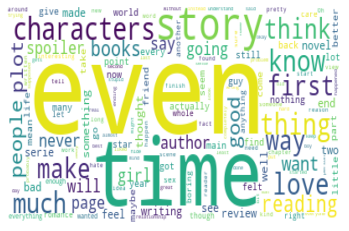

In [25]:
wordcloud_one = WordCloud(collocations=False,background_color="white", max_words=150, stopwords=wc_new_stopwords).generate(One_Rating)

# Display the generated image:
plt.imshow(wordcloud_one, interpolation='bilinear',aspect="auto")
plt.axis("off")
# store to file
plt.show()

# Sample Data

In [250]:
weights = {5: 1,
          4: 1,
          3: 2,
          2: 5,
          1: 7,
          0:6}

In [251]:
df['weights'] = df['rating'].apply(lambda x: weights[x])
df

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments,weights
0,8842281e1d1347389f2ab93d60773d4d,18245960,dfdbb7b0eb5a7e4c26d59a937e2e5feb,5,This is a special book. It started slow for ab...,Sun Jul 30 07:44:10 -0700 2017,Wed Aug 30 00:00:26 -0700 2017,Sat Aug 26 12:05:52 -0700 2017,Tue Aug 15 13:23:18 -0700 2017,28,1,1
1,8842281e1d1347389f2ab93d60773d4d,16981,a5d2c3628987712d0e05c4f90798eb67,3,Recommended by Don Katz. Avail for free in Dec...,Mon Dec 05 10:46:44 -0800 2016,Wed Mar 22 11:37:04 -0700 2017,0,N/A,1,0,2
2,8842281e1d1347389f2ab93d60773d4d,28684704,2ede853b14dc4583f96cf5d120af636f,3,"A fun, fast paced science fiction thriller. I ...",Tue Nov 15 11:29:22 -0800 2016,Mon Mar 20 23:40:27 -0700 2017,Sat Mar 18 23:22:42 -0700 2017,Fri Mar 17 23:45:40 -0700 2017,22,0,2
3,8842281e1d1347389f2ab93d60773d4d,27161156,ced5675e55cd9d38a524743f5c40996e,0,Recommended reading to understand what is goin...,Wed Nov 09 17:37:04 -0800 2016,Wed Nov 09 17:38:20 -0800 2016,0,N/A,5,1,6
4,8842281e1d1347389f2ab93d60773d4d,25884323,332732725863131279a8e345b63ac33e,4,"I really enjoyed this book, and there is a lot...",Mon Apr 25 09:31:23 -0700 2016,Mon Apr 25 09:31:23 -0700 2016,Sun Jun 26 00:00:00 -0700 2016,Sat May 28 00:00:00 -0700 2016,9,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
899995,b9450d1c1f97f891c392b1105959b56e,11832081,7c34c15ad8cb28a4afca32946e2016ea,3,3.5 stars. \n Jenna is a popular YA author and...,Fri Nov 16 22:10:17 -0800 2012,Sat Nov 17 22:42:44 -0800 2012,Sat Nov 17 00:00:00 -0800 2012,Fri Nov 16 00:00:00 -0800 2012,0,0,2
899996,b9450d1c1f97f891c392b1105959b56e,16095092,e979c735276431915d089cfaf446d64f,3,This was a quick read for me. I have read a lo...,Fri Nov 16 22:09:49 -0800 2012,Sat Nov 17 23:38:58 -0800 2012,Sat Nov 17 00:00:00 -0800 2012,Fri Nov 16 00:00:00 -0800 2012,1,1,2
899997,b9450d1c1f97f891c392b1105959b56e,8430896,feb9fe6439f9fbba8a1cce36020ad977,4,** spoiler alert ** \n 3.5 stars. \n This book...,Tue Nov 13 05:38:24 -0800 2012,Tue Nov 13 23:29:17 -0800 2012,Tue Nov 13 00:00:00 -0800 2012,Tue Nov 13 00:00:00 -0800 2012,1,0,1
899998,b9450d1c1f97f891c392b1105959b56e,12275680,741e29369f70531bfffbd02add86f228,4,** spoiler alert ** \n Another fun read from M...,Mon Nov 12 05:42:30 -0800 2012,Tue Nov 13 22:32:05 -0800 2012,Tue Nov 13 00:00:00 -0800 2012,Mon Nov 12 00:00:00 -0800 2012,0,0,1


In [252]:
sample_df = df.sample(n = 100000, weights = 'weights', random_state=42)

In [253]:
sample_df.head()

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments,weights
340415,d1343464ab5b2d0d2e5c2bc543fb788b,30644891,656cfd012a2b6b4ff3fd8806a34cfdaf,1,"So far this is the biggest contender for ""Bigg...",Mon Oct 03 06:37:43 -0700 2016,Sat Feb 25 04:49:22 -0800 2017,Thu Oct 06 00:00:00 -0700 2016,Mon Oct 03 00:00:00 -0700 2016,23,3,7
855236,6122df12bb030536895739c5747f6311,4570768,69485fe87e9dd01788bb37609c757a80,2,"I liked it/thought it was okay, but the ending...",Fri Apr 06 15:17:20 -0700 2012,Fri Apr 06 15:19:12 -0700 2012,0,N/A,0,0,5
657492,cc589432bb9400a77e5609802647f8cc,23492630,22399061ce4d44a2afbf432d36f8f78e,1,Hell NO. I gave up on this after two skeevy ch...,Mon Apr 25 17:55:56 -0700 2016,Mon May 09 11:17:19 -0700 2016,Thu May 05 00:00:00 -0700 2016,Mon May 02 00:00:00 -0700 2016,0,0,7
539352,e3d3693045b28da751165d74f18756f3,18404248,50ee8c917d154990b155c7c263ee00f9,2,Disappointing. I look forward to my yearly Che...,Sat Apr 05 12:33:23 -0700 2014,Thu Jul 10 12:20:52 -0700 2014,Thu Jul 10 12:20:52 -0700 2014,Mon Jun 02 00:00:00 -0700 2014,0,0,5
141061,879d4548d46ff3334f4dd7e1b006d6b1,30813362,2e1dcf6dceecbaa2948e090b181f40b7,5,*** Copy provided to Bayou Book Junkie in exch...,Thu Aug 11 20:01:39 -0700 2016,Thu Aug 11 20:02:57 -0700 2016,Mon Aug 08 00:00:00 -0700 2016,N/A,0,0,1


In [254]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 340415 to 440423
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       100000 non-null  object
 1   book_id       100000 non-null  int64 
 2   review_id     100000 non-null  object
 3   rating        100000 non-null  int64 
 4   review_text   100000 non-null  object
 5   date_added    100000 non-null  object
 6   date_updated  100000 non-null  object
 7   read_at       100000 non-null  object
 8   started_at    100000 non-null  object
 9   n_votes       100000 non-null  int64 
 10  n_comments    100000 non-null  int64 
 11  weights       100000 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 9.9+ MB


In [255]:
sample_df['rating'].value_counts()

3    22818
2    20137
4    19908
5    16716
1    10493
0     9928
Name: rating, dtype: int64

## Drop Columns

In [256]:
sample_df.drop(columns=['user_id', 'book_id', 'review_id', 'date_added', 'date_updated',
                'started_at', 'read_at', 'n_votes', 'n_comments', 'weights'], inplace = True)

In [257]:
sample_df.head()

,rating,review_text
340415,1,"So far this is the biggest contender for ""Bigg..."
855236,2,"I liked it/thought it was okay, but the ending..."
657492,1,Hell NO. I gave up on this after two skeevy ch...
539352,2,Disappointing. I look forward to my yearly Che...
141061,5,*** Copy provided to Bayou Book Junkie in exch...


In [258]:
sample_df.drop(sample_df[(df['rating'] == 0)].index, inplace=True)

sample_df

<ipython-input-258-48406b2263ef>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sample_df.drop(sample_df[(df['rating'] == 0)].index, inplace=True)


,rating,review_text
340415,1,"So far this is the biggest contender for ""Bigg..."
855236,2,"I liked it/thought it was okay, but the ending..."
657492,1,Hell NO. I gave up on this after two skeevy ch...
539352,2,Disappointing. I look forward to my yearly Che...
141061,5,*** Copy provided to Bayou Book Junkie in exch...
...,...,...
159085,5,"OMG! This was, oh, so amazing! Full of adventu..."
231402,4,The suspense and unease that are maintained fr...
850526,3,Words have always swirled around me like snowf...
201737,1,"I think I should've read this back in the day,..."


In [259]:
sample_df['rating'].value_counts()

3    22818
2    20137
4    19908
5    16716
1    10493
Name: rating, dtype: int64

# Train Test Split

In [260]:
X = sample_df.drop("rating", axis = 1)
y = sample_df["rating"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify = y)

# Standardizing

Run the cell below to view some examples of the features:

In [261]:
import nltk
nltk.download('wordnet')


import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 

def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    stem_words=[stemmer.stem(w) for w in filtered_words]
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(filtered_words)


X_train['review_text']=X_train['review_text'].map(lambda s:preprocess(s))
X_test['review_text']=X_test['review_text'].map(lambda s:preprocess(s))

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/henryvangorp/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
<ipython-input-261-1328b8670c3c>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['review_text']=X_train['review_text'].map(lambda s:preprocess(s))
<ipython-input-261-1328b8670c3c>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['review_text']=X_test['review_text'].map(lambda s:preprocess(s))


In [284]:
X_train.iloc[100]["review_text"]

'street fighter seems shy listening wow second book lunar chronicles series finished second book happy see first time tried read cinder finish let alone read second book scarlet characters added story first afraid might able sort remember characters nonetheless way marissa writing story made whole storyline clear connected things liked book plot idea well connected really interlocking plot interesting enough keep keep reading well cinder shadow original fairytale scarlet characters totally different storyline bad thing writing say really liked marissa writing sentences beautiful captain carswell thorne hahaha like much like sarcastically funny personality huge ego captain prefer sound girls much impressed things dislike book failed like wolf thing scarlet big part book opinion whether like main character great effect liking book wolf like book super violent brave violent get scarlet liked much short time even wronged silly girl thing unhealthy complaint everything else story great reco

train_sample = X_train.sample(5, random_state=22)
train_sample["label"] = [y_train[val] for val in train_sample.index]
train_sample.style.set_properties(**{'text-align': 'left'})

review_sample = train_sample.iloc[0]["review_text"]
review_sample

review_sample.lower()

## Standardize Full Dataset

train_sample["review_text"] = train_sample["review_text"].str.lower()

train_sample.style.set_properties(**{'text-align': 'left'})

In the cell below, perform the same operation on the full X_train:

X_train["review_text"] = X_train["review_text"].str.lower()
X_test["review_text"] = X_test["review_text"].str.lower()

X_train.iloc[100]["review_text"]

# Tokenizing

In [262]:
review_sample2 = train_sample.iloc[1]["review_text"]
review_sample2

"truthfully 3.5 stars for me (i.e. somewhere between 'i liked it' and 'i loved it) - goodreads gods, please bring out a half star option! any who, the plot is a lot more intriguing then the blurb gives it credit for - reading the blurb it sounds like there is no plot. there are good twists and turns, ranging from 'that's amazing' to 'wtf?' i loved the next generation kids and for the older generation ginny in particular, the perfect combination of weasley humour, intelligence and sass - she's the perfect partner for harry. the only gaping hole i cannot get over, and this may be hard to judge before seeing it for myself - there is no reason that i can see why this should be a play over a novel. i can't help but feel a novel would have been a lot more satisfying, and allowed a deeper exploration of characters rather than skimming over them to fit in so much plot, if it had been a novel. i wanted to know the next generation kids better outside of albus and scorpius, no teddy lupin, victoi

In [263]:
review_sample2.split()[:10]

['truthfully',
 '3.5',
 'stars',
 'for',
 'me',
 '(i.e.',
 'somewhere',
 'between',
 "'i",
 'liked']

In [264]:
from nltk.tokenize import RegexpTokenizer

basic_token_pattern = r"(?u)\b\w\w+\b"

tokenizer = RegexpTokenizer(basic_token_pattern)
tokenizer.tokenize(review_sample2)[:10]

['truthfully',
 'stars',
 'for',
 'me',
 'somewhere',
 'between',
 'liked',
 'it',
 'and',
 'loved']

## Tokenizing Full Dataset

In [265]:
train_sample["text_tokenized"] = train_sample["review_text"].apply(tokenizer.tokenize)

train_sample.style.set_properties(**{'text-align': 'left'})

Create new column with tokenized data

In [266]:
X_train["text_tokenized"] = X_train["review_text"].apply(tokenizer.tokenize)
X_test["text_tokenized"] = X_test["review_text"].apply(tokenizer.tokenize)

<ipython-input-266-d41133729210>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["text_tokenized"] = X_train["review_text"].apply(tokenizer.tokenize)
<ipython-input-266-d41133729210>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["text_tokenized"] = X_test["review_text"].apply(tokenizer.tokenize)


In [267]:
X_train.iloc[100]["text_tokenized"][:20]

['street',
 'fighter',
 'seems',
 'shy',
 'listening',
 'wow',
 'second',
 'book',
 'lunar',
 'chronicles',
 'series',
 'finished',
 'second',
 'book',
 'happy',
 'see',
 'first',
 'time',
 'tried',
 'read']

## Exploratory Data Analysis: Frequency Distributions

In [268]:
from nltk import FreqDist

example_freq_dist = FreqDist(X_train.iloc[100]["text_tokenized"][:20])
example_freq_dist

FreqDist({'second': 2, 'book': 2, 'street': 1, 'fighter': 1, 'seems': 1, 'shy': 1, 'listening': 1, 'wow': 1, 'lunar': 1, 'chronicles': 1, ...})

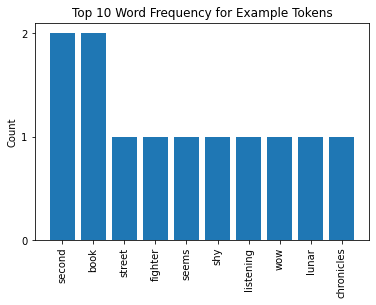

In [269]:
from matplotlib.ticker import MaxNLocator

def visualize_top_10(freq_dist, title):

    top_10 = list(zip(*freq_dist.most_common(10)))
    tokens = top_10[0]
    counts = top_10[1]

    fig, ax = plt.subplots()
    ax.bar(tokens, counts)

    ax.set_title(title)
    ax.set_ylabel("Count")
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.tick_params(axis="x", rotation=90)
    
visualize_top_10(example_freq_dist, "Top 10 Word Frequency for Example Tokens")

## Visualizing the Frequency Distribution for the Full Dataset

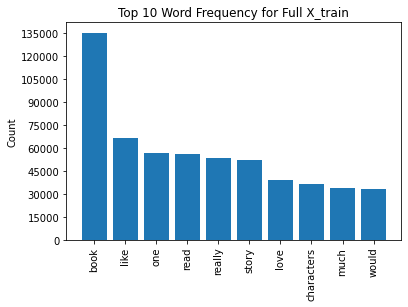

In [270]:
train_freq_dist = FreqDist(X_train["text_tokenized"].explode())

visualize_top_10(train_freq_dist, "Top 10 Word Frequency for Full X_train")

# Modeling

## Baseline Model with TfidVectorizer and MultinomialNB

In [271]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=1000)

X_train_vectorized = tfidf.fit_transform(X_train["review_text"])
X_test_vectorized = tfidf.transform(X_test["review_text"])

pd.DataFrame.sparse.from_spmatrix(X_train_vectorized, columns=tfidf.get_feature_names())

,ability,able,absolutely,across,act,action,actions,actual,actually,adam,...,written,wrong,wrote,yeah,year,years,yes,yet,young,younger
0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
1,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.108424,0.0,...,0.000000,0.0,0.0,0.077888,0.065171,0.000000,0.134630,0.0,0.000000,0.0
2,0.0,0.0,0.228013,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
3,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
4,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67549,0.0,0.0,0.000000,0.065154,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.094681,0.0,0.0,0.000000,0.000000,0.200931,0.108406,0.0,0.000000,0.0
67550,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
67551,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.080992,0.0
67552,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0


In [272]:
assert X_train_vectorized.shape[0] == X_train.shape[0]

assert X_train_vectorized.shape[1] == 1000

In [273]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score

baseline_model = MultinomialNB()

baseline_cv = cross_val_score(baseline_model, X_train_vectorized, y_train)
baseline_cv

array([0.44467471, 0.4403079 , 0.4446007 , 0.44548886, 0.44145078])

In [274]:
y_train.value_counts(normalize=True)

3    0.253323
2    0.223569
4    0.221023
5    0.185585
1    0.116499
Name: rating, dtype: float64

In [275]:
from sklearn.metrics import classification_report

baseline_model.fit(X_train_vectorized, y_train)
y_pred = baseline_model.predict(X_test_vectorized)

In [276]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.75      0.14      0.24      2623
           2       0.43      0.47      0.45      5034
           3       0.39      0.64      0.48      5705
           4       0.41      0.34      0.37      4977
           5       0.62      0.47      0.54      4179

    accuracy                           0.45     22518
   macro avg       0.52      0.41      0.42     22518
weighted avg       0.49      0.45      0.43     22518



#### GridSearch on Baseline Model

In [277]:
NB_grid = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0],
          'fit_prior': [True, False],
           'class_prior': [None]
}

In [278]:
NB_grid_search = GridSearchCV(estimator=baseline_model, param_grid=NB_grid, verbose=2)

In [279]:
NB_grid_search.fit(X_train_vectorized, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] alpha=0.01, class_prior=None, fit_prior=True ....................
[CV] ..... alpha=0.01, class_prior=None, fit_prior=True, total=   0.0s
[CV] alpha=0.01, class_prior=None, fit_prior=True ....................
[CV] ..... alpha=0.01, class_prior=None, fit_prior=True, total=   0.0s
[CV] alpha=0.01, class_prior=None, fit_prior=True ....................
[CV] ..... alpha=0.01, class_prior=None, fit_prior=True, total=   0.0s
[CV] alpha=0.01, class_prior=None, fit_prior=True ....................
[CV] ..... alpha=0.01, class_prior=None, fit_prior=True, total=   0.0s
[CV] alpha=0.01, class_prior=None, fit_prior=True ....................
[CV] ..... alpha=0.01, class_prior=None, fit_prior=True, total=   0.0s
[CV] alpha=0.01, class_prior=None, fit_prior=False ...................
[CV] .... alpha=0.01, class_prior=None, fit_prior=False, total=   0.0s
[CV] alpha=0.01, class_prior=None, fit_prior=False ...................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .... alpha=0.01, class_prior=None, fit_prior=False, total=   0.0s
[CV] alpha=0.01, class_prior=None, fit_prior=False ...................
[CV] .... alpha=0.01, class_prior=None, fit_prior=False, total=   0.0s
[CV] alpha=0.01, class_prior=None, fit_prior=False ...................
[CV] .... alpha=0.01, class_prior=None, fit_prior=False, total=   0.0s
[CV] alpha=0.01, class_prior=None, fit_prior=False ...................
[CV] .... alpha=0.01, class_prior=None, fit_prior=False, total=   0.0s
[CV] alpha=0.1, class_prior=None, fit_prior=True .....................
[CV] ...... alpha=0.1, class_prior=None, fit_prior=True, total=   0.0s
[CV] alpha=0.1, class_prior=None, fit_prior=True .....................
[CV] ...... alpha=0.1, class_prior=None, fit_prior=True, total=   0.0s
[CV] alpha=0.1, class_prior=None, fit_prior=True .....................
[CV] ...... alpha=0.1, class_prior=None, fit_prior=True, total=   0.0s
[CV] alpha=0.1, class_prior=None, fit_prior=True .....................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.2s finished


GridSearchCV(estimator=MultinomialNB(),
             param_grid={'alpha': [0.01, 0.1, 0.5, 1.0, 10.0],
                         'class_prior': [None], 'fit_prior': [True, False]},
             verbose=2)

In [280]:
NB_grid_search.best_params_

{'alpha': 10.0, 'class_prior': None, 'fit_prior': False}

In [281]:
baseline_model_2 = MultinomialNB(alpha = 10.0,
                                    fit_prior=False,
                                class_prior=None)
baseline_model_2.fit(X_train_vectorized, y_train)
y_pred_2 = baseline_model_2.predict(X_test_vectorized)

In [282]:
print(classification_report(y_test, y_pred_2))

              precision    recall  f1-score   support

           1       0.44      0.61      0.51      2623
           2       0.47      0.41      0.44      5034
           3       0.45      0.41      0.43      5705
           4       0.41      0.36      0.38      4977
           5       0.53      0.63      0.58      4179

    accuracy                           0.46     22518
   macro avg       0.46      0.48      0.47     22518
weighted avg       0.46      0.46      0.46     22518



### Removing Stopwords

In [285]:
import nltk
nltk.download('stopwords')


from nltk.corpus import stopwords

stopwords_list = stopwords.words('english')
stopwords_list[:20]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/henryvangorp/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his']

In [286]:
def remove_stopwords(token_list):
    """
    Given a list of tokens, return a list where the tokens
    that are also present in stopwords_list have been
    removed
    """
    stopwords_removed = [token for token in token_list if token not in stopwords_list]
    return stopwords_removed

In [287]:
# Run this cell without changes
tokens_example = X_train.iloc[100]["text_tokenized"]
print("Length with stopwords:", len(tokens_example))

tokens_example_without_stopwords = remove_stopwords(tokens_example)
print("Length without stopwords:", len(tokens_example_without_stopwords))

Length with stopwords: 176
Length without stopwords: 176


In [288]:
X_train["text_without_stopwords"] = X_train["text_tokenized"].apply(remove_stopwords)

<ipython-input-288-8ea6976fb268>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["text_without_stopwords"] = X_train["text_tokenized"].apply(remove_stopwords)


In [289]:
tfidf = TfidfVectorizer(
    max_features=1000,
    stop_words=stopwords_list
)

# Fit the vectorizer on X_train["text"] and transform it
X_train_vectorized_stop = tfidf.fit_transform(X_train["review_text"])

# Visually inspect the vectorized data
pd.DataFrame.sparse.from_spmatrix(X_train_vectorized_stop, columns=tfidf.get_feature_names())

,ability,able,absolutely,across,act,action,actions,actual,actually,adam,...,written,wrong,wrote,yeah,year,years,yes,yet,young,younger
0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
1,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.108424,0.0,...,0.000000,0.0,0.0,0.077888,0.065171,0.000000,0.134630,0.0,0.000000,0.0
2,0.0,0.0,0.228013,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
3,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
4,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67549,0.0,0.0,0.000000,0.065154,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.094681,0.0,0.0,0.000000,0.000000,0.200931,0.108406,0.0,0.000000,0.0
67550,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
67551,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.080992,0.0
67552,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0


In [290]:
stopwords_removed_cv = cross_val_score(baseline_model, X_train_vectorized_stop, y_train)
stopwords_removed_cv

array([0.44467471, 0.4403079 , 0.4446007 , 0.44548886, 0.44145078])

In [291]:
baseline_model.fit(X_train_vectorized_stop, y_train)
y_pred_stop = baseline_model.predict(X_test_vectorized)

In [292]:
print(classification_report(y_test, y_pred_stop))

              precision    recall  f1-score   support

           1       0.75      0.14      0.24      2623
           2       0.43      0.47      0.45      5034
           3       0.39      0.64      0.48      5705
           4       0.41      0.34      0.37      4977
           5       0.62      0.47      0.54      4179

    accuracy                           0.45     22518
   macro avg       0.52      0.41      0.42     22518
weighted avg       0.49      0.45      0.43     22518



#### Gridsearch with Stop Words Removed

In [293]:
NB_grid_search.fit(X_train_vectorized_stop, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] alpha=0.01, class_prior=None, fit_prior=True ....................
[CV] ..... alpha=0.01, class_prior=None, fit_prior=True, total=   0.0s
[CV] alpha=0.01, class_prior=None, fit_prior=True ....................
[CV] ..... alpha=0.01, class_prior=None, fit_prior=True, total=   0.0s
[CV] alpha=0.01, class_prior=None, fit_prior=True ....................
[CV] ..... alpha=0.01, class_prior=None, fit_prior=True, total=   0.0s
[CV] alpha=0.01, class_prior=None, fit_prior=True ....................
[CV] ..... alpha=0.01, class_prior=None, fit_prior=True, total=   0.0s
[CV] alpha=0.01, class_prior=None, fit_prior=True ....................
[CV] ..... alpha=0.01, class_prior=None, fit_prior=True, total=   0.0s
[CV] alpha=0.01, class_prior=None, fit_prior=False ...................
[CV] .... alpha=0.01, class_prior=None, fit_prior=False, total=   0.0s
[CV] alpha=0.01, class_prior=None, fit_prior=False ...................
[CV] .... alpha=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .... alpha=0.01, class_prior=None, fit_prior=False, total=   0.0s
[CV] alpha=0.01, class_prior=None, fit_prior=False ...................
[CV] .... alpha=0.01, class_prior=None, fit_prior=False, total=   0.0s
[CV] alpha=0.01, class_prior=None, fit_prior=False ...................
[CV] .... alpha=0.01, class_prior=None, fit_prior=False, total=   0.0s
[CV] alpha=0.1, class_prior=None, fit_prior=True .....................
[CV] ...... alpha=0.1, class_prior=None, fit_prior=True, total=   0.0s
[CV] alpha=0.1, class_prior=None, fit_prior=True .....................
[CV] ...... alpha=0.1, class_prior=None, fit_prior=True, total=   0.0s
[CV] alpha=0.1, class_prior=None, fit_prior=True .....................
[CV] ...... alpha=0.1, class_prior=None, fit_prior=True, total=   0.0s
[CV] alpha=0.1, class_prior=None, fit_prior=True .....................
[CV] ...... alpha=0.1, class_prior=None, fit_prior=True, total=   0.0s
[CV] alpha=0.1, class_prior=None, fit_prior=True .....................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.2s finished


GridSearchCV(estimator=MultinomialNB(),
             param_grid={'alpha': [0.01, 0.1, 0.5, 1.0, 10.0],
                         'class_prior': [None], 'fit_prior': [True, False]},
             verbose=2)

In [294]:
NB_grid_search.best_params_

{'alpha': 10.0, 'class_prior': None, 'fit_prior': False}

In [295]:
baseline_model_stop = MultinomialNB(alpha = 0.01,
                                    fit_prior=True,
                                class_prior=None)
baseline_model_stop.fit(X_train_vectorized_stop, y_train)
y_pred_stop2 = baseline_model_stop.predict(X_test_vectorized)

In [296]:
print(classification_report(y_test, y_pred_stop2))

              precision    recall  f1-score   support

           1       0.75      0.15      0.25      2623
           2       0.43      0.47      0.45      5034
           3       0.39      0.63      0.48      5705
           4       0.41      0.34      0.37      4977
           5       0.63      0.48      0.54      4179

    accuracy                           0.45     22518
   macro avg       0.52      0.41      0.42     22518
weighted avg       0.49      0.45      0.43     22518



### Using Custom Tokens

In [297]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer(language="english")

def stem_and_tokenize(document):
    tokens = tokenizer.tokenize(document)
    return [stemmer.stem(token) for token in tokens]

In [298]:
print("Original sample:", X_train.iloc[100]["text_tokenized"][20:30])
print("Stemmed sample: ", stem_and_tokenize(X_train.iloc[100]["review_text"])[20:30])

Original sample: ['cinder', 'finish', 'let', 'alone', 'read', 'second', 'book', 'scarlet', 'characters', 'added']
Stemmed sample:  ['cinder', 'finish', 'let', 'alon', 'read', 'second', 'book', 'scarlet', 'charact', 'ad']


In [299]:
stemmed_stopwords = [stemmer.stem(word) for word in stopwords_list]

In [300]:
tfidf = TfidfVectorizer(
    max_features=1000,
    stop_words=stemmed_stopwords,
    tokenizer=stem_and_tokenize
)


X_train_vectorized_token = tfidf.fit_transform(X_train["review_text"])

pd.DataFrame.sparse.from_spmatrix(X_train_vectorized_token, columns=tfidf.get_feature_names())

,abil,abl,absolut,abus,accept,across,act,action,actual,ad,...,written,wrong,wrote,yeah,year,yes,yet,young,younger,zombi
0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.096121,0.0,...,0.000000,0.0,0.0,0.073045,0.050045,0.12627,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.225278,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67549,0.0,0.0,0.000000,0.0,0.0,0.060643,0.000000,0.0,0.000000,0.0,...,0.088125,0.0,0.0,0.000000,0.159961,0.10090,0.0,0.000000,0.0,0.0
67550,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0
67551,0.0,0.0,0.000000,0.0,0.0,0.000000,0.088762,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.079792,0.0,0.0
67552,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0


In [301]:
stemmed_cv = cross_val_score(baseline_model, X_train_vectorized_token, y_train)
stemmed_cv

array([0.43867959, 0.4376434 , 0.43912368, 0.43801347, 0.43478905])

In [302]:
baseline_model.fit(X_train_vectorized_token, y_train)
y_pred_token = baseline_model.predict(X_test_vectorized)

In [303]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.75      0.14      0.24      2623
           2       0.43      0.47      0.45      5034
           3       0.39      0.64      0.48      5705
           4       0.41      0.34      0.37      4977
           5       0.62      0.47      0.54      4179

    accuracy                           0.45     22518
   macro avg       0.52      0.41      0.42     22518
weighted avg       0.49      0.45      0.43     22518



#### Gridsearch After Creating Custom Tokens

In [304]:
NB_grid_search.fit(X_train_vectorized_token, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] alpha=0.01, class_prior=None, fit_prior=True ....................
[CV] ..... alpha=0.01, class_prior=None, fit_prior=True, total=   0.0s
[CV] alpha=0.01, class_prior=None, fit_prior=True ....................
[CV] ..... alpha=0.01, class_prior=None, fit_prior=True, total=   0.0s
[CV] alpha=0.01, class_prior=None, fit_prior=True ....................
[CV] ..... alpha=0.01, class_prior=None, fit_prior=True, total=   0.0s
[CV] alpha=0.01, class_prior=None, fit_prior=True ....................
[CV] ..... alpha=0.01, class_prior=None, fit_prior=True, total=   0.0s
[CV] alpha=0.01, class_prior=None, fit_prior=True ....................
[CV] ..... alpha=0.01, class_prior=None, fit_prior=True, total=   0.0s
[CV] alpha=0.01, class_prior=None, fit_prior=False ...................
[CV] .... alpha=0.01, class_prior=None, fit_prior=False, total=   0.0s
[CV] alpha=0.01, class_prior=None, fit_prior=False ...................
[CV] .... alpha=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .... alpha=0.01, class_prior=None, fit_prior=False, total=   0.0s
[CV] alpha=0.01, class_prior=None, fit_prior=False ...................
[CV] .... alpha=0.01, class_prior=None, fit_prior=False, total=   0.0s
[CV] alpha=0.01, class_prior=None, fit_prior=False ...................
[CV] .... alpha=0.01, class_prior=None, fit_prior=False, total=   0.0s
[CV] alpha=0.1, class_prior=None, fit_prior=True .....................
[CV] ...... alpha=0.1, class_prior=None, fit_prior=True, total=   0.0s
[CV] alpha=0.1, class_prior=None, fit_prior=True .....................
[CV] ...... alpha=0.1, class_prior=None, fit_prior=True, total=   0.0s
[CV] alpha=0.1, class_prior=None, fit_prior=True .....................
[CV] ...... alpha=0.1, class_prior=None, fit_prior=True, total=   0.0s
[CV] alpha=0.1, class_prior=None, fit_prior=True .....................
[CV] ...... alpha=0.1, class_prior=None, fit_prior=True, total=   0.0s
[CV] alpha=0.1, class_prior=None, fit_prior=True .....................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.2s finished


GridSearchCV(estimator=MultinomialNB(),
             param_grid={'alpha': [0.01, 0.1, 0.5, 1.0, 10.0],
                         'class_prior': [None], 'fit_prior': [True, False]},
             verbose=2)

In [305]:
NB_grid_search.best_params_

{'alpha': 10.0, 'class_prior': None, 'fit_prior': False}

In [306]:
baseline_model_token = MultinomialNB(alpha = 10.0,
                                    fit_prior=False,
                                class_prior=None)
baseline_model_stop.fit(X_train_vectorized_token, y_train)
y_pred_token2 = baseline_model_stop.predict(X_test_vectorized)

In [307]:
print(classification_report(y_test, y_pred_token2))

              precision    recall  f1-score   support

           1       0.20      0.01      0.01      2623
           2       0.22      0.19      0.21      5034
           3       0.27      0.37      0.31      5705
           4       0.22      0.39      0.28      4977
           5       0.24      0.08      0.13      4179

    accuracy                           0.24     22518
   macro avg       0.23      0.21      0.19     22518
weighted avg       0.23      0.24      0.21     22518



## Second Model with Random Forest

In [308]:
from sklearn.ensemble import RandomForestClassifier

rf_baseline_model = RandomForestClassifier()

In [309]:
rf_baseline_model.fit(X_train_vectorized, y_train)
y_pred_rf = rf_baseline_model.predict(X_test_vectorized)

In [310]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           1       0.58      0.26      0.36      2623
           2       0.41      0.47      0.44      5034
           3       0.38      0.51      0.44      5705
           4       0.38      0.28      0.32      4977
           5       0.52      0.52      0.52      4179

    accuracy                           0.42     22518
   macro avg       0.45      0.41      0.42     22518
weighted avg       0.44      0.42      0.42     22518



In [311]:
rf_grid = { 
    'n_estimators': [100, 200, 300, 1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [5,6,7],
    'criterion' :['gini', 'entropy']
}

In [312]:
rf_grid_search = GridSearchCV(estimator=rf_baseline_model,
                              param_grid=rf_grid, cv=5, n_jobs=1)

rf_grid_search.fit(X_train_vectorized, y_train)

## Third Model with XG Boost 

In [313]:
from xgboost import XGBClassifier

xgb_baseline_model = XGBClassifier()

In [314]:
xgb_baseline_model.fit(X_train_vectorized, y_train)
y_pred_XG = xgb_baseline_model.predict(X_test_vectorized)

In [315]:
print(classification_report(y_test, y_pred_XG))

              precision    recall  f1-score   support

           1       0.57      0.38      0.46      2623
           2       0.44      0.46      0.45      5034
           3       0.42      0.47      0.44      5705
           4       0.37      0.37      0.37      4977
           5       0.56      0.55      0.55      4179

    accuracy                           0.45     22518
   macro avg       0.47      0.44      0.45     22518
weighted avg       0.46      0.45      0.45     22518



# Change Rating to Binary

In [ ]:
sample_df.head()

In [ ]:
sample_df['Updated_Rating']=sample_df['rating'].apply(lambda x: 1 if x >= 4 else 0)

In [ ]:
sample_df.head()